In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import resource
from datetime import datetime
import json

## Run times analyis

In [3]:
DATA_FOLDER = "../saved_ll/"

In [4]:
def plot(data, filename, total_runs):
    
    barWidth = 0.25
    
    # set height of bar
    min_time = [data[filename][total_runs][date]["min"] for date in data[filename][total_runs]]
    avg_time = [data[filename][total_runs][date]["avg"] for date in data[filename][total_runs]]
    std_time = [data[filename][total_runs][date]["std"] for date in data[filename][total_runs]]

    print(min_time)
    
    # Set position of bar on X axis
    r1 = np.arange(len(min_time))
    r2 = [x + barWidth for x in r1]
    
    # Make the plot
    plt.bar(r1, min_time, color='red', width=barWidth, edgecolor='white', label='min')
    plt.bar(r2, avg_time, color='blue', width=barWidth, edgecolor='white', label='avg', yerr=std_time)

    # Add xticks on the middle of the group bars
    plt.xlabel('date', fontweight='bold')
    plt.xticks([r + barWidth/2 for r in range(len(min_time))], [date for date in data[filename][total_runs]])
    plt.ylabel('runtime (seconds)')
    # plt.ylim(0.43, 0.46)
    plt.title(f"runtime with {total_runs} executions")

    # Create legend & Show graphic
    plt.legend()
    plt.show()



In [5]:
def plot2(data):
    
    barWidth = 0.25
    
    # set height of bar
    min_time = [elem["min"] for elem in data]
    avg_time = [elem["avg"] for elem in data]
    std_time = [elem["std"] for elem in data]

    print(min_time)
    
    # Set position of bar on X axis
    r1 = np.arange(len(min_time))
    r2 = [x + barWidth for x in r1]
    
    # Make the plot
    plt.bar(r1, min_time, color='red', width=barWidth, edgecolor='white', label='min')
    plt.bar(r2, avg_time, color='blue', width=barWidth, edgecolor='white', label='avg', yerr=std_time)

    # Add xticks on the middle of the group bars
    plt.xlabel('date', fontweight='bold')
    plt.xticks([r + barWidth/2 for r in range(len(min_time))], [str(i) for i in range(len(data))])
    plt.ylabel('runtime (seconds)')
    # plt.ylim(0.43, 0.46)
    

    # Create legend & Show graphic
    plt.legend()
    plt.show()


In [6]:
def time_file(file, total_runs, optim_level="-O0"):
    subprocess.run(["clang-9",
                        optim_level,
                        "-o", "res", 
                        file,
                        "-march=native",
                        "-mllvm", "-enable-misched=false",
                        "-lm",
                        ])
    pid = os.getpid()
    os.sched_setaffinity(pid, {0})
    times = []
    for i in range(total_runs):
        usage_start = resource.getrusage(resource.RUSAGE_CHILDREN)
        subprocess.run(["./res"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
        usage_end = resource.getrusage(resource.RUSAGE_CHILDREN)
        times.append(usage_end.ru_utime - usage_start.ru_utime)
        
    min_time = min(times)
    avg_time = np.mean(times)
    std_time = np.std(times)
    os.sched_setaffinity(pid, {0, 1, 2, 3})
    subprocess.run(["rm", "res"])
    
    return {"min": min_time, "avg": avg_time, "std": std_time}

In [4]:
# run_times = {file: {} for file in os.listdir(DATA_FOLDER)}
with open("data.json", "r") as read_file:
    run_times = json.load(read_file)

In [19]:
total_runs = 30
for file in run_times:
    if file == '0.484.ll':
        res = time_file(f"{DATA_FOLDER}{file}", total_runs)
        now = datetime.now()
        date = now.strftime("%d/%m %H:%M")
        if str(total_runs) in run_times[file]: 
            run_times[file][str(total_runs)][date] = res
        else:
            run_times[file][str(total_runs)] = {}
            run_times[file][str(total_runs)][date] = res
                
# save        
with open('data.json', 'w') as fp:
    json.dump(run_times, fp)

[0.43481199999999376, 0.4993259999999964, 0.4466330000000198, 0.454780999999997, 0.44331099999999424]
[0.5074466666666714, 0.5746243333333325, 0.4488153333333382, 0.5086263333333344, 0.45147133333333045]


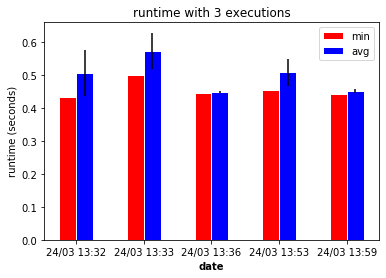

In [5]:
plot(run_times, '0.484.ll', '3')

[0.4408209999999997, 0.4405619999999999, 0.4392750000000092, 0.4432369999999537, 0.4370059999999967]
[0.4976353999999986, 0.4736331000000007, 0.4681241, 0.4694623999999976, 0.4888475999999969]


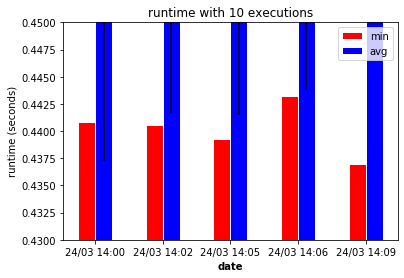

In [11]:
plot(run_times, '0.484.ll', '10')

[0.43781799999999294, 0.43839700000000903, 0.4310120000000097, 0.4353629999999953, 0.43552999999997155]
[0.4755651499999999, 0.47311935000000177, 0.4552651999999995, 0.4835758999999996, 0.4699117000000001]


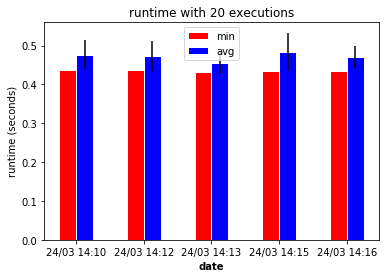

In [15]:
plot(run_times, '0.484.ll', '20')

[0.43118199999999973, 0.4294409999999971, 0.4303390000000036, 0.42725300000000743]
[0.4682617, 0.4580908999999996, 0.44995343333333343, 0.4517572666666666]


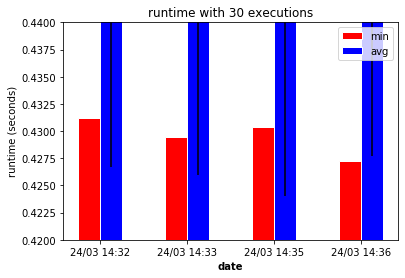

In [20]:
plot(run_times, '0.484.ll', '30')

In [6]:
res = []
for i in range(15):
    res.append(time_file(f"{DATA_FOLDER}/0.2817.ll", 50, "-O2"))

[0.26608699999999885, 0.26370500000000163, 0.26817999999999387, 0.26985499999999973, 0.26503200000000504, 0.2634139999999974, 0.2658490000000029, 0.26239900000000205, 0.26639000000000124, 0.2634699999999839, 0.2732819999999947, 0.26283200000000306, 0.26192599999998833, 0.26437500000000114, 0.2735309999999913]


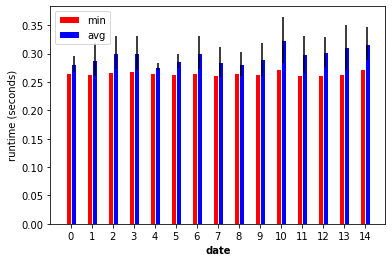

In [18]:
plot2(res)

[0.26303500000000213, 0.2584059999999795, 0.2642979999999966, 0.26287700000000314, 0.2629880000000071, 0.26510899999993853, 0.26501599999994596, 0.26357400000006237, 0.26214900000002217, 0.2594259999999622, 0.26257399999997233, 0.2624590000000353, 0.26270899999997255, 0.26509699999996883, 0.2580590000000029]


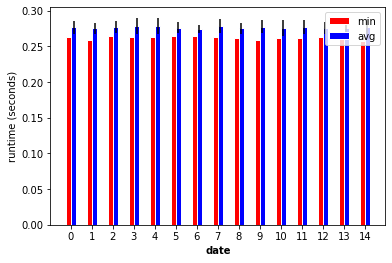

In [20]:
res2 = []
for i in range(15):
    res2.append(time_file(f"{DATA_FOLDER}/0.3202.ll", 50, "-O2"))
plot2(res2)

[6.174022999999806, 6.178777999999966, 6.1777649999999085, 6.17277600000034, 6.1746790000001965]


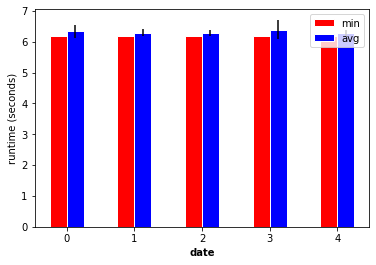

In [26]:
res2 = []
for i in range(5):
    res2.append(time_file(f"{DATA_FOLDER}/6.2467.ll", 30, "-O2"))
plot2(res2)

[6.130781000000297, 6.14044899999999, 6.125624999999673, 6.127899999999954, 6.1302559999999175]


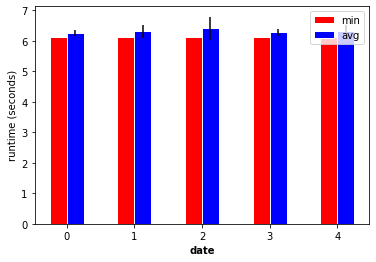

In [28]:
res3 = []
for i in range(5):
    res3.append(time_file(f"{DATA_FOLDER}/7.3424.ll", 30, "-O2"))
plot2(res3)

[6.096291000000292, 6.096860000000106, 6.095443000000159, 6.097631999999976, 6.097622000000229]


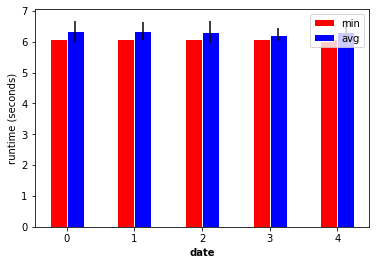

In [29]:
res4 = []
for i in range(5):
    res4.append(time_file(f"{DATA_FOLDER}/7.225.ll", 30, "-O2"))
plot2(res4)

[6.133754000000408, 6.136088999999629, 6.200830000000678, 6.145445000000109, 6.121503000000303]


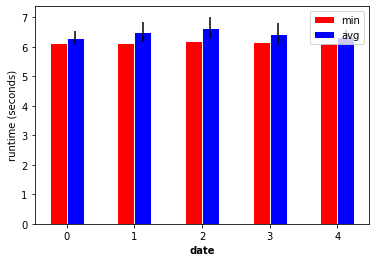

In [30]:
res5 = []
for i in range(5):
    res5.append(time_file(f"{DATA_FOLDER}/7.225.ll", 15, "-O2"))
plot2(res5)

[6.247583999999961, 6.226869999999963, 6.2162679999999, 6.247790000000009, 6.271976999999993]


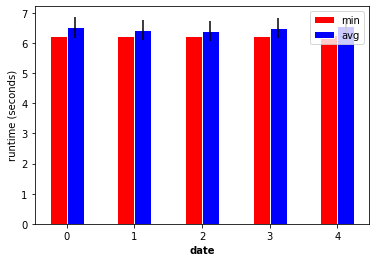

In [13]:
res6 = []
for i in range(5):
    res6.append(time_file(f"{DATA_FOLDER}/6.3661.ll", 15, "-O2"))
plot2(res6)

[6.252102000000036, 6.262291000000005, 6.247181999999839, 6.2259959999998955, 6.225406999999905]


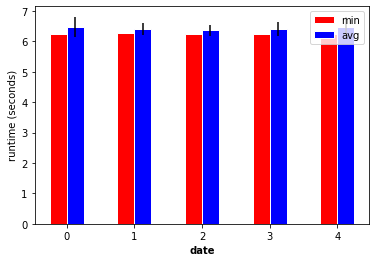

In [14]:
res7 = []
for i in range(5):
    res7.append(time_file(f"{DATA_FOLDER}/6.264.ll", 15, "-O2"))
plot2(res7)

[0.26304300000001035, 0.2671840000000145, 0.26826399999998785, 0.2708590000000015, 0.26635699999997087]


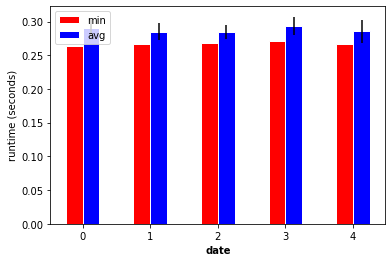

In [10]:
res8 = []
for i in range(5):
    res8.append(time_file(f"{DATA_FOLDER}/0.2669.ll", 50, "-O2"))
plot2(res8)

In [1]:
import pickle 


In [2]:
rewards = pickle.load(open("../rewards.p", "rb"))
rewards_cray = pickle.load(open("../rewards_cray.p", "rb"))


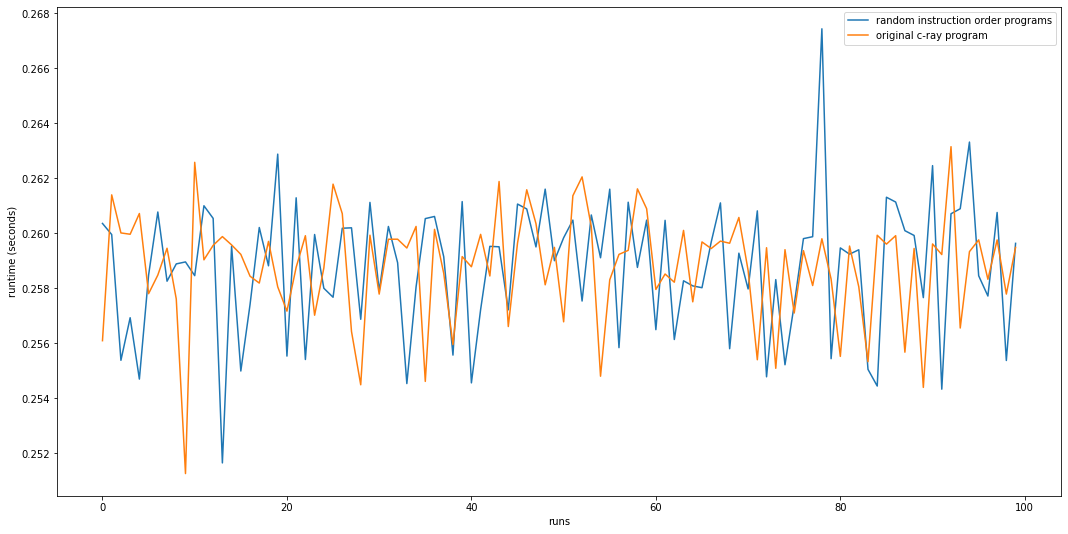

In [8]:
plt.figure(figsize=(18,9))
plt.plot(rewards, label="random instruction order programs")
plt.plot(rewards_cray, label="original c-ray program")
plt.ylabel("runtime (seconds)")
plt.xlabel("runs")
plt.legend()
plt.show()

In [36]:
np.mean(rewards)

0.2587825100000154

In [37]:
np.mean(rewards_cray)

0.25879358000001496

In [3]:
rewards_O0_cray = pickle.load(open("../dump/rewards_cray_O0.p", "rb"))
rewards_O0 = pickle.load(open("../dump/rewards_rand_O0.p", "rb"))

rewards_O0_boost = pickle.load(open("../dump/rewards_rand_O0_2.p", "rb"))
rewards_O0_boost_cray = pickle.load(open("../dump/rewards_cray_O0_2.p", "rb"))

rewards_cray_pi = pickle.load(open("../dump/pi_cray_O0", "rb"))
rewards_cray_pi2 = pickle.load(open("../dump/cray_pi_2", "rb"))

rewards_rand_pi = pickle.load(open("../dump/pi_rand_O0", "rb"))
rewards_rand_pi_2 = pickle.load(open("../dump/rand_pi_2", "rb"))




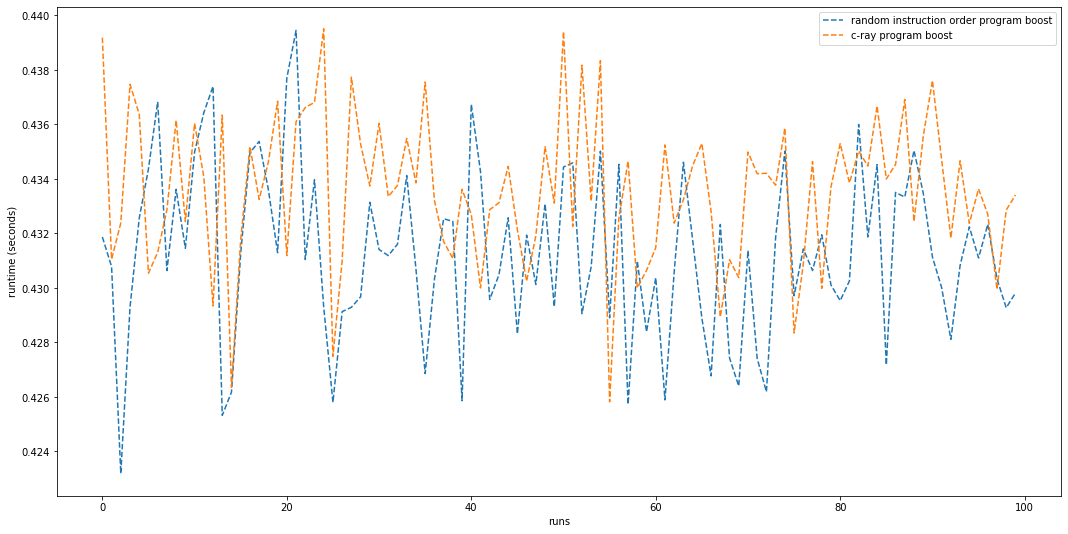

In [4]:
plt.figure(figsize=(18,9))
# plt.plot(rewards_O0, label="random instruction order programs(O0)")
# plt.plot(rewards_O0_cray, label="original c-ray (O0) program")

plt.plot(rewards_O0_boost, label="random instruction order program boost", ls ="--")
plt.plot(rewards_O0_boost_cray, label="c-ray program boost", ls ="--")



plt.ylabel("runtime (seconds)")
plt.xlabel("runs")
plt.legend()
plt.show()

In [13]:
np.std(rewards_O0_cray)/np.mean(rewards_O0_cray)

0.005499999411158035

In [35]:
np.mean(rewards_O0)

0.43391725999998293

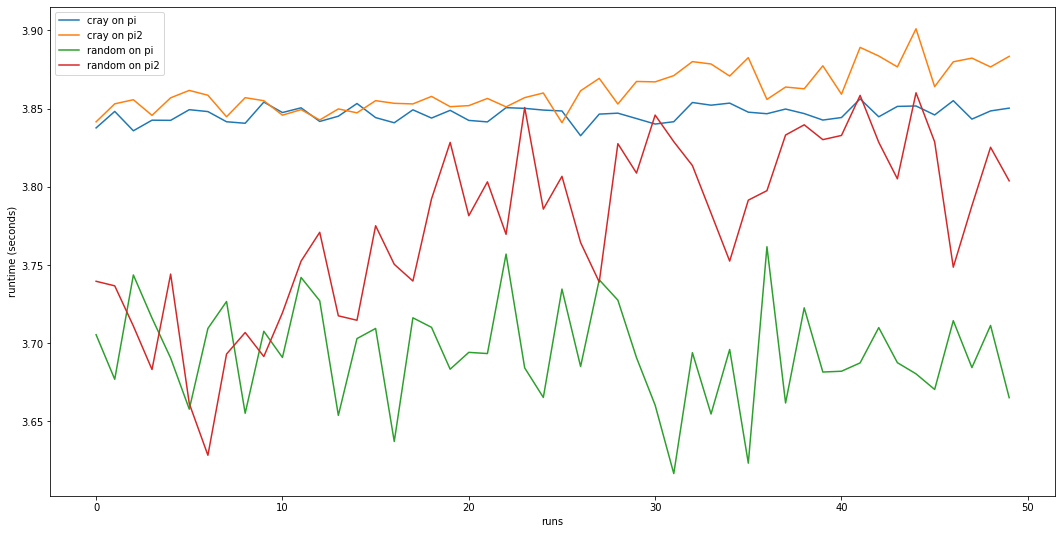

In [15]:
plt.figure(figsize=(18,9))
plt.plot(rewards_cray_pi, label="cray on pi")
plt.plot(rewards_cray_pi2, label="cray on pi2")
plt.plot(rewards_rand_pi, label="random on pi")
plt.plot(rewards_rand_pi_2, label="random on pi2")


plt.ylabel("runtime (seconds)")
plt.xlabel("runs")
plt.legend()
plt.show()

In [12]:
np.std(rewards_cray_pi)/np.mean(rewards_cray_pi)

0.0013067621870457688

In [18]:
np.std(rewards_rand_pi)/np.mean(rewards_rand_pi)

0.008579793541521654

In [14]:
rewards_cray_random = pickle.load(open("../cray_pi_rand_2000", "rb"))
rt_cray_random = pickle.load(open("../results/cray_pi_rand_2000", "rb"))["min"]

rewards_cray_random_small = pickle.load(open("../cray_pi_rand_small1", "rb"))["min"]

In [5]:
rewards = rewards_cray_random["r"]

In [10]:
import pandas

In [12]:
dqn_1 = pandas.read_csv("../results/run_c-ray-f-2-pi_dqn_oh_True_6-tag-episode_reward.csv")
dqn_1_rewards = dqn_1["Value"]

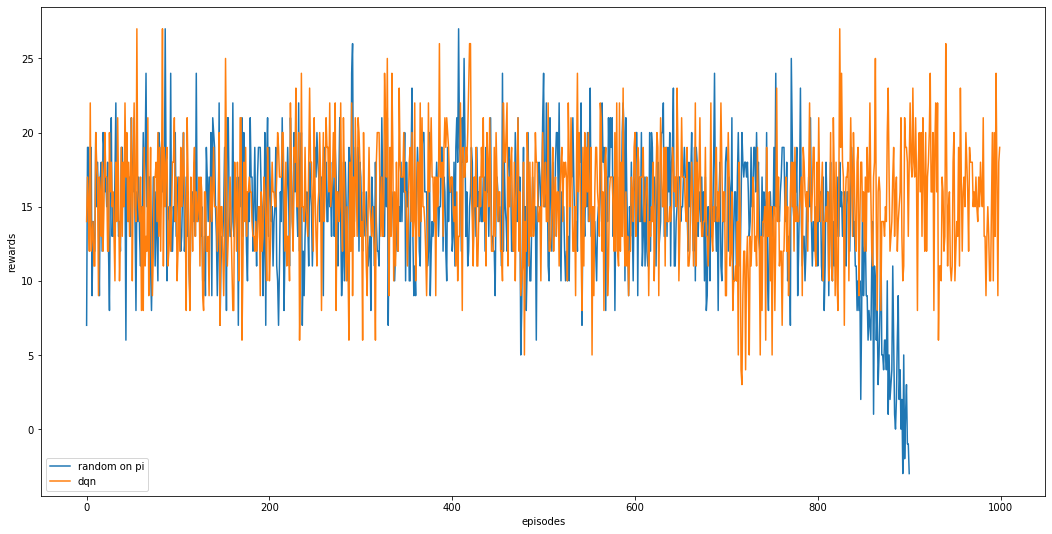

In [14]:
plt.figure(figsize=(18,9))

plt.plot(rewards, label="random on pi")
plt.plot(dqn_1_rewards, label="dqn")


plt.ylabel("rewards")
plt.xlabel("episodes")
plt.legend()
plt.show()

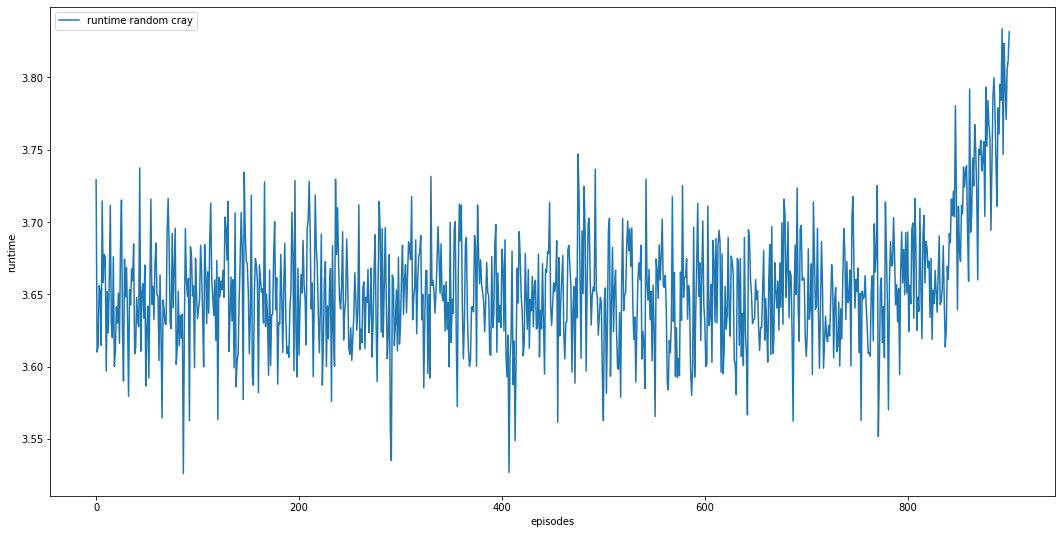

In [16]:
plt.figure(figsize=(18,9))

plt.plot(rt_cray_random, label="runtime random cray")

plt.ylabel("runtime")
plt.xlabel("episodes")
plt.legend()
plt.show()

In [118]:
import pickle 
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 22})

In [119]:
b_rand_pi = pickle.load(open("../benchmark_results/rand_pi_c_benchmark", "rb"))
b_pi = pickle.load(open("../benchmark_results/pi_c_benchmark", "rb"))

In [120]:
avg_time_pi = b_pi["mean"]
min_time_pi = b_pi["min"]

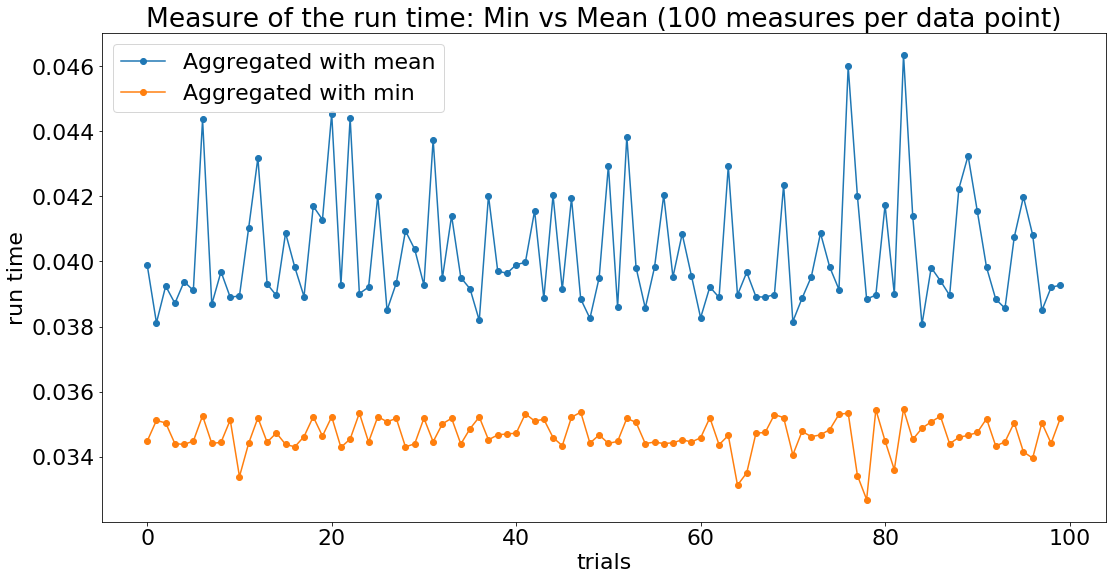

In [121]:
plt.figure(figsize=(18,9))

plt.plot(avg_time_pi, label="Aggregated with mean", marker="o")
plt.plot(min_time_pi, label="Aggregated with min", marker="o")


plt.ylabel("run time")
plt.xlabel("trials")
plt.legend()
plt.title("Measure of the run time: Min vs Mean (100 measures per data point)")
#plt.show()
plt.savefig("max_vs_min_100_pc.png")


In [122]:
print(f"variation coef for mean: {np.std(avg_time_pi)/np.mean(avg_time_pi)}")
print(f"variation coef for min: {np.std(min_time_pi)/np.mean(min_time_pi)}")     

NameError: name 'np' is not defined

In [123]:
min_time_rand_pi = b_rand_pi["min"]

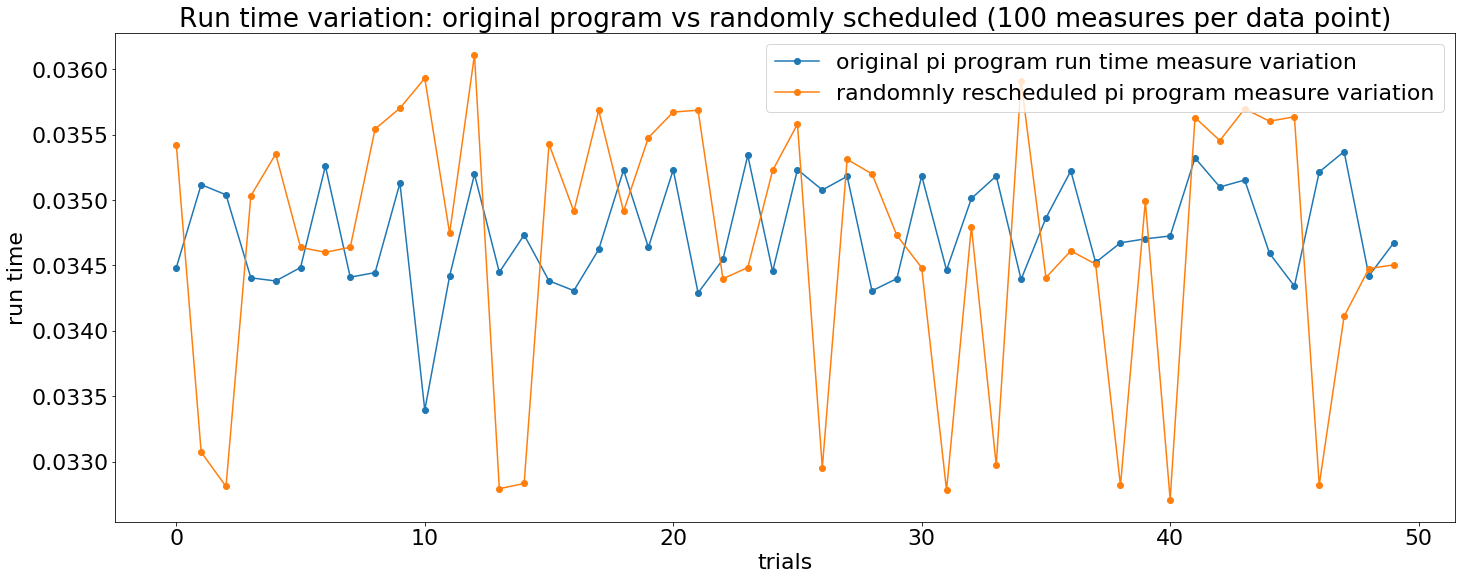

In [125]:
plt.figure(figsize=(24,9))

plt.plot(min_time_pi[:50], label="original pi program run time measure variation", marker="o")
plt.plot(min_time_rand_pi, label="randomnly rescheduled pi program measure variation", marker="o")


plt.ylabel("run time")
plt.xlabel("trials")
plt.title("Run time variation: original program vs randomly scheduled (100 measures per data point)")
plt.legend()
# plt.show()
plt.savefig("rand_vs_original_100_pc.png")


In [30]:
print(f"variation coef for origninal: {np.std(min_time_pi[:50])/np.mean(min_time_pi[:50])}")
print(f"variation coef for random: {np.std(min_time_rand_pi)/np.mean(min_time_rand_pi)}")



variation coef for origninal: 0.011724530710784413
variation coef for random: 0.02958552827955586


In [126]:
b_rand_pi_1000 = pickle.load(open("../benchmark_results/rand_pi_c_benchmark_1000", "rb"))
min_time_rand_pi_1000 = b_rand_pi_1000["min"]
avg_time_rand_pi_1000 = b_rand_pi_1000["mean"]


b_pi_1000 = pickle.load(open("../benchmark_results/pi_c_benchmark_1000", "rb"))
min_time_pi_1000 = b_pi_1000["min"]
avg_time_pi_1000 = b_pi_1000["mean"]



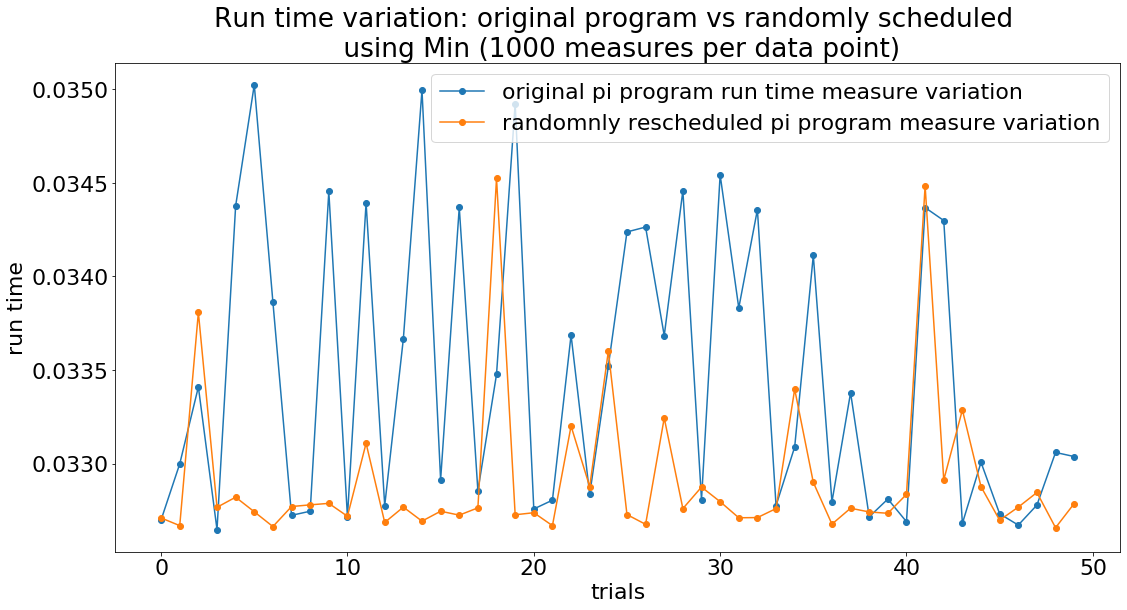

In [135]:
plt.figure(figsize=(18,9))


plt.plot(min_time_pi_1000, label="original pi program run time measure variation", marker="o")
plt.plot(min_time_rand_pi_1000, label="randomnly rescheduled pi program measure variation", marker="o")



plt.ylabel("run time")
plt.xlabel("trials")
plt.title("Run time variation: original program vs randomly scheduled \n using Min (1000 measures per data point)")
plt.legend()
#plt.show()
plt.savefig("rand_vs_original_1000_pc_min.png")


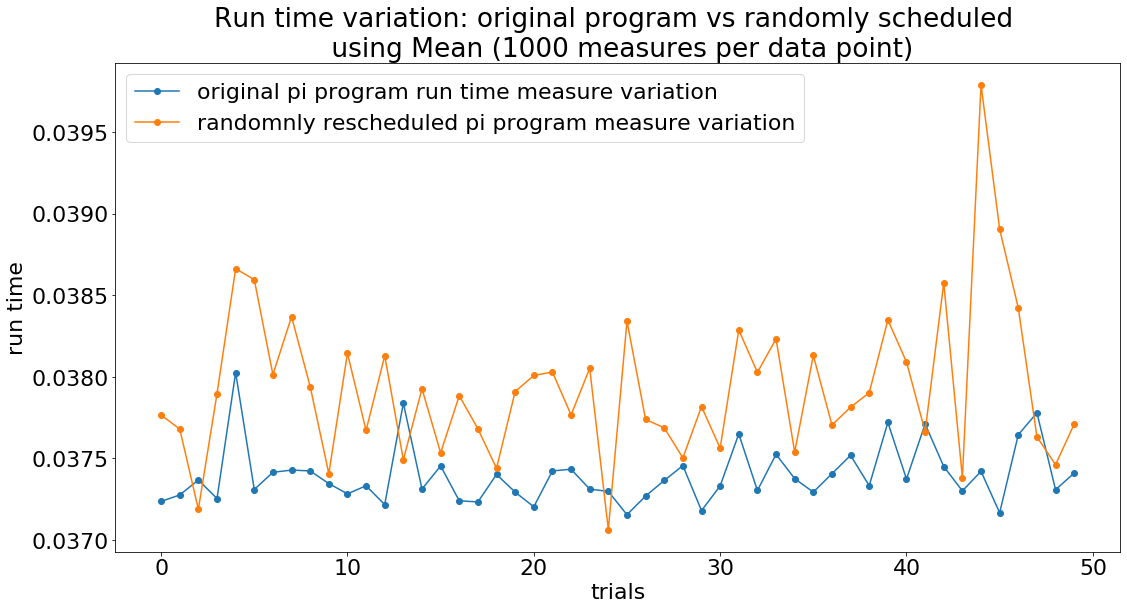

In [134]:
plt.figure(figsize=(18,9))

plt.plot(avg_time_pi_1000, label="original pi program run time measure variation", marker="o")
plt.plot(avg_time_rand_pi_1000, label="randomnly rescheduled pi program measure variation", marker="o")




plt.ylabel("run time")
plt.xlabel("trials")
plt.title("Run time variation: original program vs randomly scheduled \n using Mean (1000 measures per data point)")
plt.legend()
#plt.show()
plt.savefig("rand_vs_original_1000_pc_mean.png")

In [28]:
print(f"variation coef for origninal: {np.std(avg_time_pi_1000)/np.mean(avg_time_pi_1000)}")
print(f"variation coef for random: {np.std(avg_time_rand_pi_1000)/np.mean(avg_time_rand_pi_1000)}")   

variation coef for origninal: 0.004754092031529871
variation coef for random: 0.012251221205849908


In [4]:
b_pi_1000_O2 = pickle.load(open("../benchmark_results/pi_c_benchmark_1000_O2", "rb"))
min_time_pi_1000_O2 = b_pi_1000_O2["min"]
avg_time_pi_1000_O2 = b_pi_1000_O2["mean"]

b_rand_pi_1000_O2 = pickle.load(open("../benchmark_results/rand_pi_c_benchmark_1000_O2", "rb"))
min_time_rand_pi_1000_O2 = b_rand_pi_1000_O2["min"]
avg_time_pi_rand_1000_O2 = b_rand_pi_1000_O2["mean"]



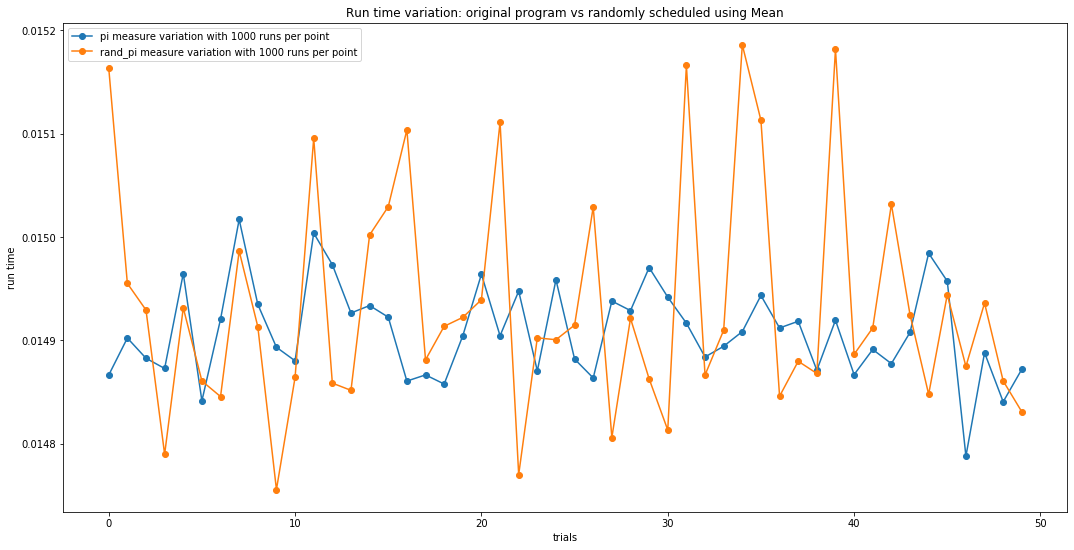

In [39]:
plt.figure(figsize=(18,9))

plt.plot(avg_time_pi_1000_O2, label="pi measure variation with 1000 runs per point", marker="o")
plt.plot(avg_time_pi_rand_1000_O2, label="rand_pi measure variation with 1000 runs per point", marker="o")


plt.ylabel("run time")
plt.xlabel("trials")
plt.title("Run time variation: original program vs randomly scheduled using Min (1000 measures per data point)")
plt.legend()
plt.show()

In [40]:
print(f"variation coef for origninal: {np.std(avg_time_pi_1000_O2)/np.mean(avg_time_pi_1000_O2)}")
print(f"variation coef for random: {np.std(avg_time_pi_rand_1000_O2)/np.mean(avg_time_pi_rand_1000_O2)}")  

variation coef for origninal: 0.00298973215700256
variation coef for random: 0.007259570991798626


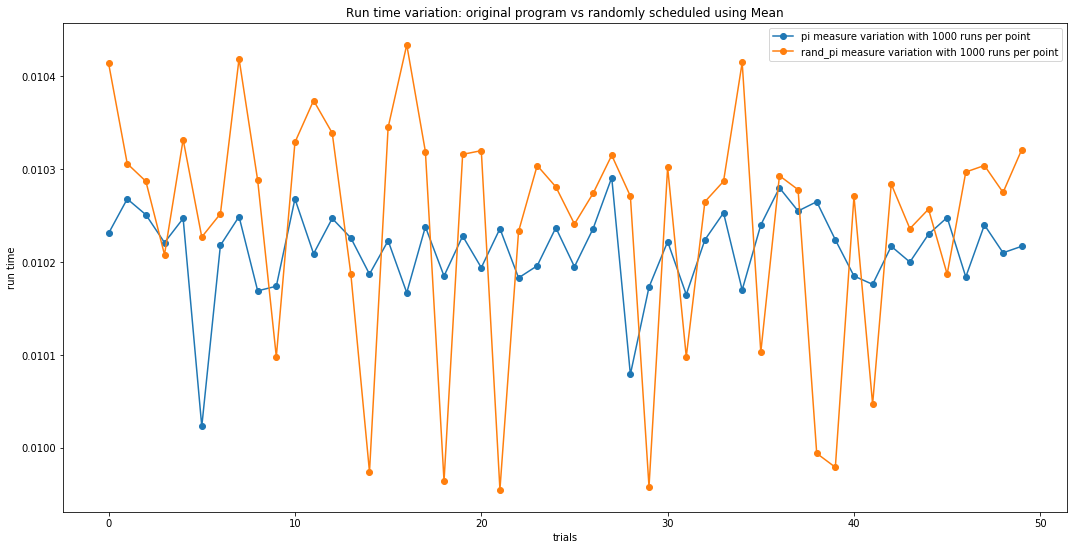

In [7]:
plt.figure(figsize=(18,9))

plt.plot(min_time_pi_1000_O2, label="pi measure variation with 1000 runs per point", marker="o")
plt.plot(min_time_rand_pi_1000_O2, label="rand_pi measure variation with 1000 runs per point", marker="o")


plt.ylabel("run time")
plt.xlabel("trials")
plt.title("Run time variation: original program vs randomly scheduled using Mean")
plt.legend()
plt.show()

In [129]:
b_pi_10_rpi = pickle.load(open("../benchmark_results/pi_c_benchmark_10_rpi", "rb"))
min_time_pi_10_rpi = b_pi_10_rpi["min"]
avg_time_pi_10_rpi = b_pi_10_rpi["mean"]

b_rand_pi_10_rpi = pickle.load(open("../benchmark_results/rand_pi_c_benchmark_10_rpi", "rb"))
min_time_rand_pi_10_rpi= b_rand_pi_10_rpi["min"]
avg_time_pi_rand_pi_10_rpi = b_rand_pi_10_rpi["mean"]

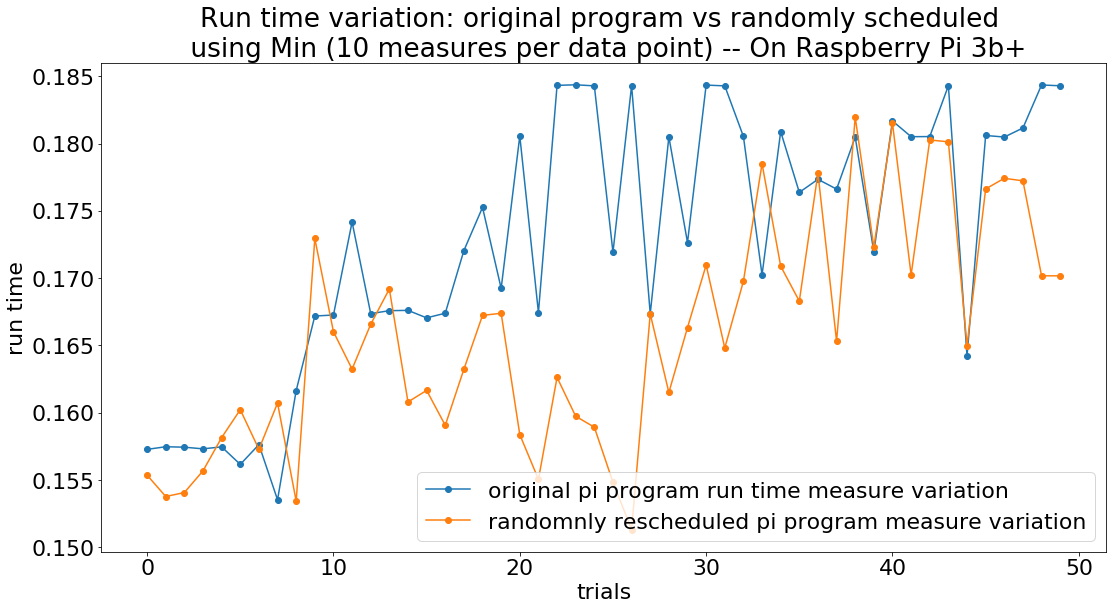

In [136]:
plt.figure(figsize=(18,9))

plt.plot(min_time_pi_10_rpi, label="original pi program run time measure variation", marker="o")
plt.plot(min_time_rand_pi_10_rpi, label="randomnly rescheduled pi program measure variation", marker="o")


plt.ylabel("run time")
plt.xlabel("trials")
plt.title("Run time variation: original program vs randomly scheduled \n using Min (10 measures per data point) -- On Raspberry Pi 3b+")
plt.legend()
#plt.show()
plt.savefig("rand_vs_original_10_rpi_min.png")

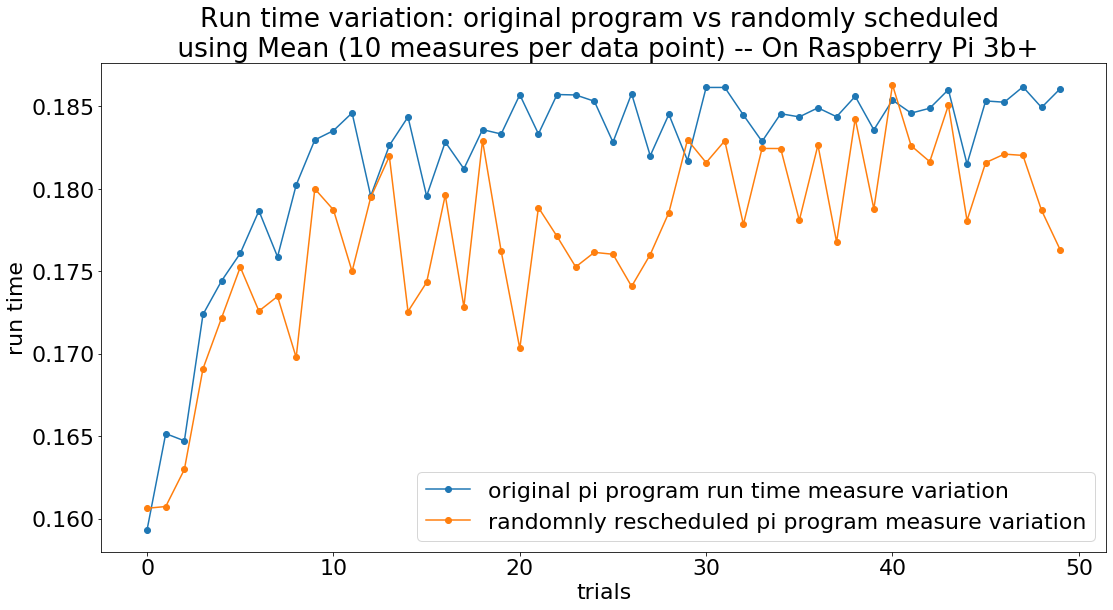

In [137]:
plt.figure(figsize=(18,9))

plt.plot(avg_time_pi_10_rpi, label="original pi program run time measure variation", marker="o")
plt.plot(avg_time_pi_rand_pi_10_rpi, label="randomnly rescheduled pi program measure variation", marker="o")


plt.ylabel("run time")
plt.xlabel("trials")
plt.title("Run time variation: original program vs randomly scheduled \n using Mean (10 measures per data point) -- On Raspberry Pi 3b+")
plt.legend()
#plt.show()
plt.savefig("rand_vs_original_10_rpi_mean.png")

In [25]:
b_pi_100_rpi = pickle.load(open("../benchmark_results/pi_c_benchmark_100_rpi", "rb"))
min_time_pi_100_rpi = b_pi_100_rpi["min"]
avg_time_pi_100_rpi = b_pi_100_rpi["mean"]

b_rand_pi_100_rpi = pickle.load(open("../benchmark_results/rand_pi_c_benchmark_100_rpi", "rb"))
min_time_rand_pi_100_rpi= b_rand_pi_100_rpi["min"]
avg_time_pi_rand_pi_100_rpi = b_rand_pi_100_rpi["mean"]

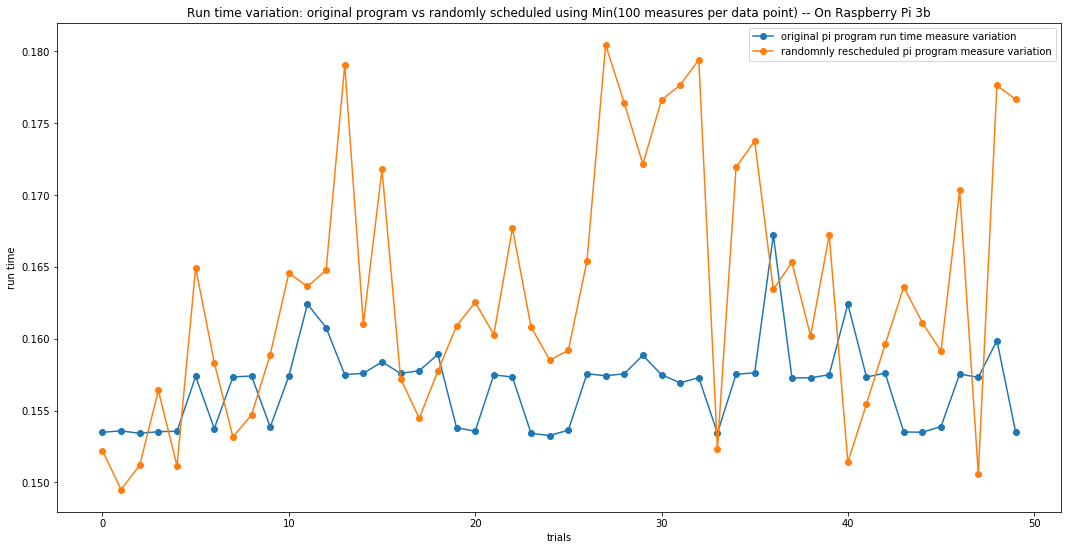

In [45]:
plt.figure(figsize=(18,9))

plt.plot(min_time_pi_100_rpi, label="original pi program run time measure variation", marker="o")
plt.plot(min_time_rand_pi_100_rpi, label="randomnly rescheduled pi program measure variation", marker="o")


plt.ylabel("run time")
plt.xlabel("trials")
plt.title("Run time variation: original program vs randomly scheduled using Min (100 measures per data point) -- On Raspberry Pi 3b")
plt.legend()
#plt.show()
plt.savefig("rand_vs_original_100_rpi_min.png")

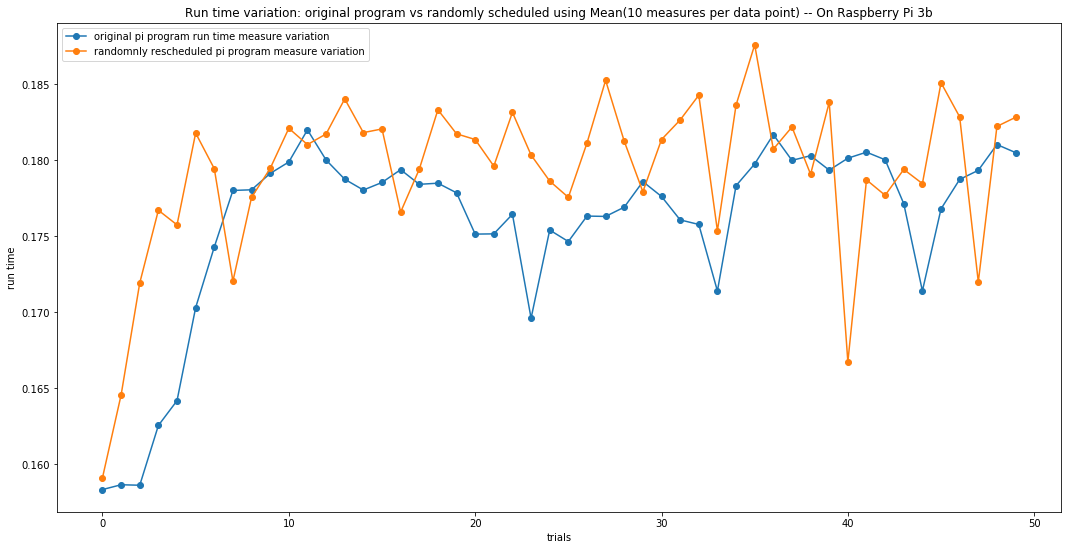

In [31]:
plt.figure(figsize=(18,9))

plt.plot(avg_time_pi_100_rpi, label="original pi program run time measure variation", marker="o")
plt.plot(avg_time_pi_rand_pi_100_rpi, label="randomnly rescheduled pi program measure variation", marker="o")


plt.ylabel("run time")
plt.xlabel("trials")
plt.title("Run time variation: original program vs randomly scheduled using Mean (100 measures per data point) -- On Raspberry Pi 3b")
plt.legend()
#plt.show()
plt.savefig("rand_vs_original_100_rpi_mean.png")

In [132]:
b_pi_10_rpi_cpu = pickle.load(open("../benchmark_results/pi_c_benchmark_10_rpi_cpu_cycles", "rb"))
min_time_pi_10_rpi_cpu = b_pi_10_rpi_cpu["min"]
avg_time_pi_10_rpi_cpu = b_pi_10_rpi_cpu["mean"]

b_rand_pi_10_rpi_cpu = pickle.load(open("../benchmark_results/rand_pi_c_benchmark_10_rpi_cpu_cycles", "rb"))
min_time_rand_pi_10_rpi_cpu = b_rand_pi_10_rpi_cpu["min"]
avg_time_rand_pi_10_rpi_cpu = b_rand_pi_10_rpi_cpu["mean"]

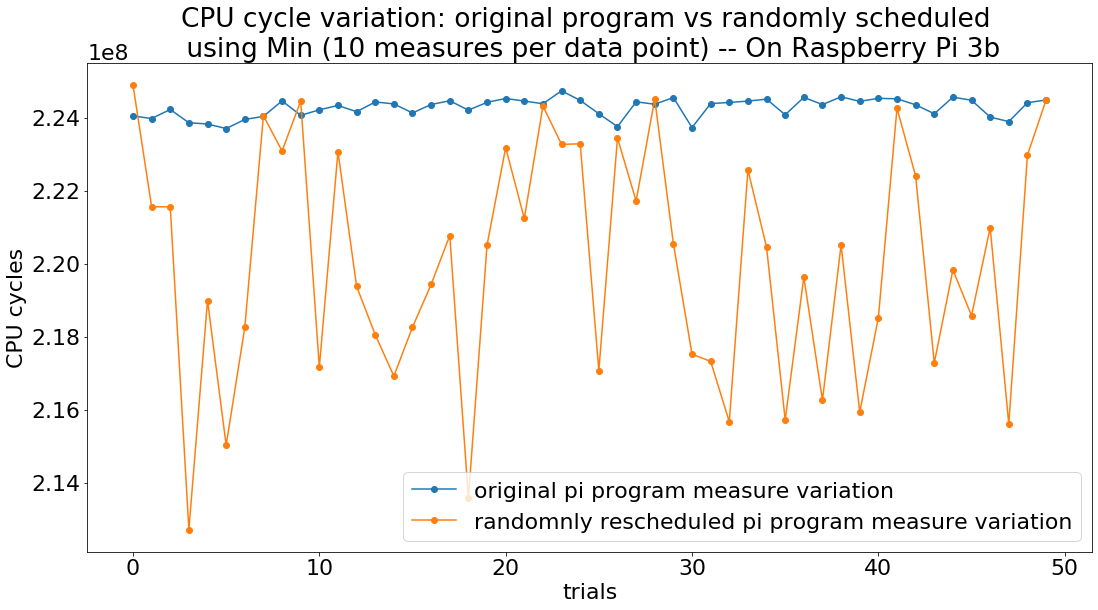

In [138]:
plt.figure(figsize=(18,9))

# plt.plot(avg_time_pi_10_rpi, label="original pi program run time measure variation", marker="o")
plt.plot(min_time_pi_10_rpi_cpu, label="original pi program measure variation", marker="o")
plt.plot(min_time_rand_pi_10_rpi_cpu, label="randomnly rescheduled pi program measure variation", marker="o")




plt.ylabel("CPU cycles")
plt.xlabel("trials")
plt.title("CPU cycle variation: original program vs randomly scheduled \n using Min (10 measures per data point) -- On Raspberry Pi 3b")
plt.legend()
#plt.show()
plt.savefig("rand_vs_original_10_rpi_min_cpu.png")

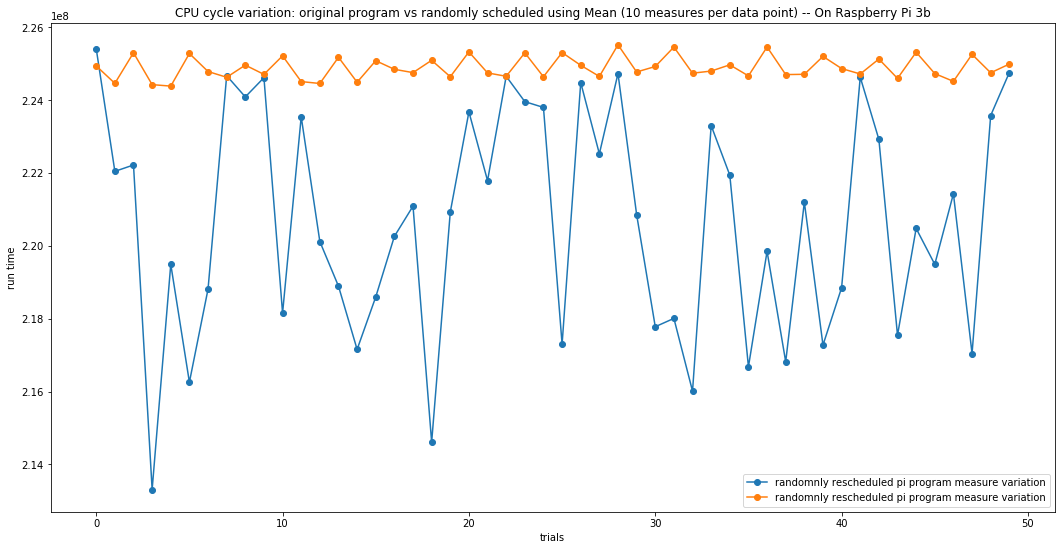

In [41]:
plt.figure(figsize=(18,9))

# plt.plot(avg_time_pi_10_rpi, label="original pi program run time measure variation", marker="o")
plt.plot(avg_time_rand_pi_10_rpi_cpu, label="randomnly rescheduled pi program measure variation", marker="o")
plt.plot(avg_time_pi_10_rpi_cpu, label="randomnly rescheduled pi program measure variation", marker="o")



plt.ylabel("run time")
plt.xlabel("trials")
plt.title("CPU cycle variation: original program vs randomly scheduled using Mean (10 measures per data point) -- On Raspberry Pi 3b")
plt.legend()
#plt.show()
plt.savefig("rand_vs_original_10_rpi_mean.png")

In [7]:
b_pi_10_cpu = pickle.load(open("../benchmark_results/pi_c_benchmark_10_cpu_cycles_O0", "rb"))
min_time_pi_10_cpu = b_pi_10_cpu["min"]
avg_time_pi_10_cpu = b_pi_10_cpu["mean"]

b_rand_pi_10_cpu = pickle.load(open("../benchmark_results/rand_pi_c_benchmark_10_cpu_cycles_O0", "rb"))
min_time_rand_pi_10_cpu = b_rand_pi_10_cpu["min"]
avg_time_rand_pi_10_cpu = b_rand_pi_10_cpu["mean"]

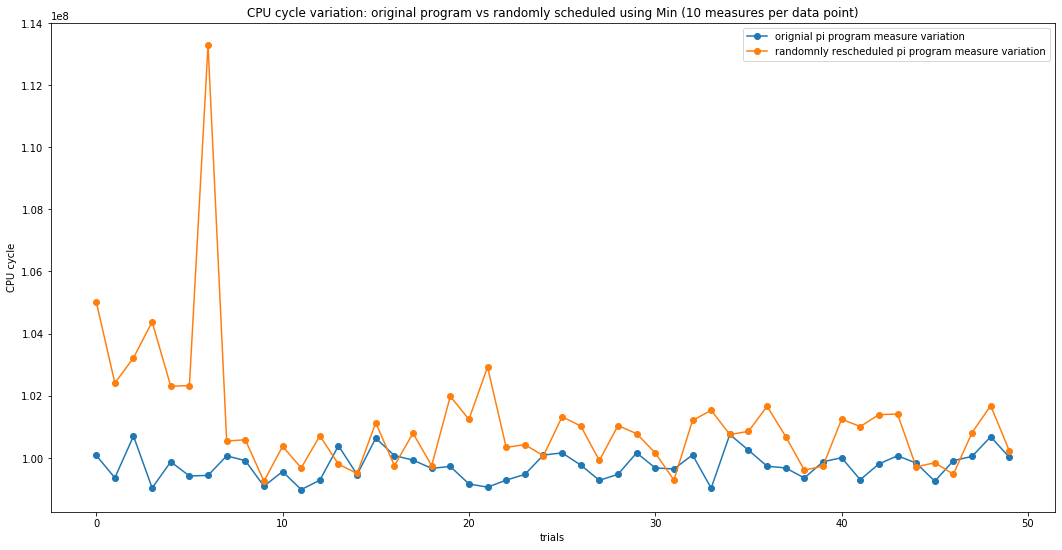

In [9]:
plt.figure(figsize=(18,9))

# plt.plot(avg_time_pi_10_rpi, label="original pi program run time measure variation", marker="o")
plt.plot(min_time_pi_10_cpu, label="orignial pi program measure variation", marker="o")
plt.plot(min_time_rand_pi_10_cpu, label="randomnly rescheduled pi program measure variation", marker="o")



plt.ylabel("CPU cycle")
plt.xlabel("trials")
plt.title("CPU cycle variation: original program vs randomly scheduled using Min (10 measures per data point)")
plt.legend()
#plt.show()
plt.savefig("rand_vs_original_10_rpi_mean.png")

In [57]:
def original_vs_rand(filenames):
    b = pickle.load(open(filenames[0], "rb"))
    _min = b["min"]
    avg = b["mean"]

    b_rand = pickle.load(open(filenames[1], "rb"))
    min_rand = b_rand ["min"]
    avg_rand= b_rand ["mean"]
    
    plt.figure(figsize=(18,9))

    # plt.plot(avg_time_pi_10_rpi, label="original pi program run time measure variation", marker="o")
    plt.plot(_min, label="original pi program measure variation", marker="o")
    plt.plot(min_rand, label="randomnly rescheduled pi program measure variation", marker="o")


    plt.ylabel("CPU cycles")
    plt.xlabel("trials")
    plt.title("CPU cycle variation: original program vs randomly scheduled using Min (10 measures per data point) -- On Raspberry Pi 3b")
    plt.legend()
    plt.show()
    
    

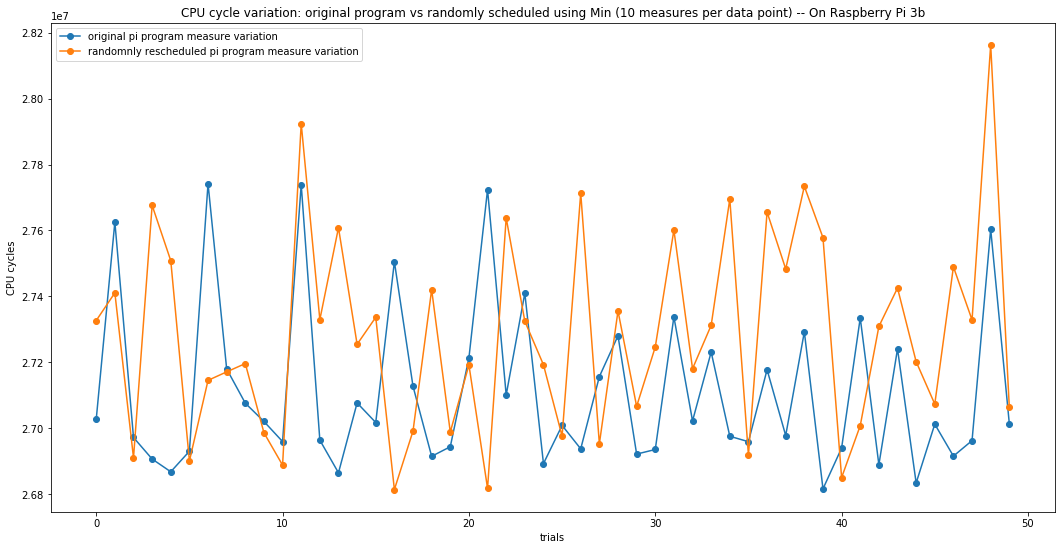

In [61]:
original_vs_rand(["../benchmark_results/c-ray_c_benchmark_10_cpu_cycles_O2","../benchmark_results/rand_c-ray_c_benchmark_10_cpu_cycles_O2"])

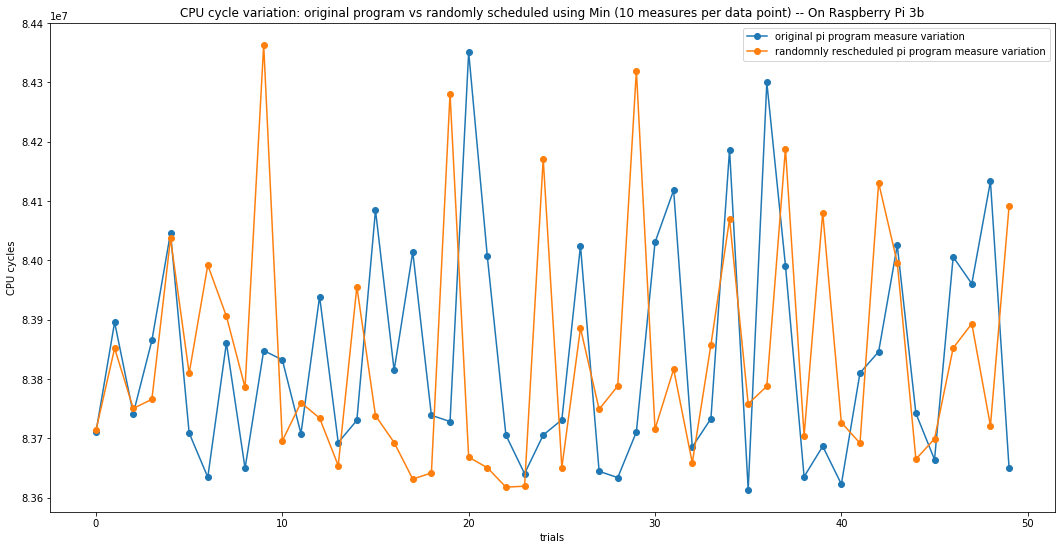

In [62]:
original_vs_rand(["../benchmark_results/pi_c_benchmark_10_cpu_cycles_O2","../benchmark_results/rand_pi_c_benchmark_10_cpu_cycles_O2"])

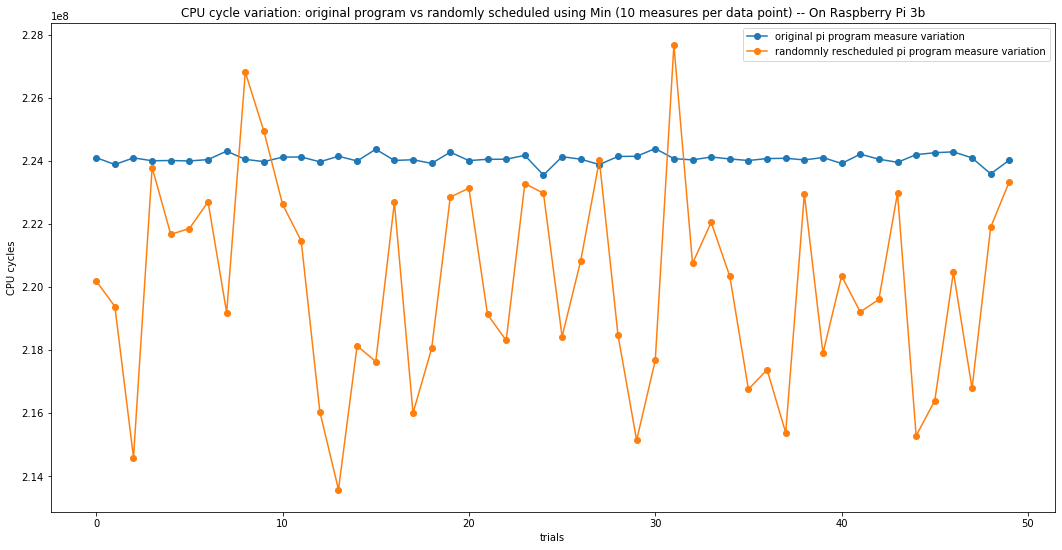

In [65]:
original_vs_rand(["../benchmark_results/pi_c_benchmark_10_rpi_cpu_cycles_V2","../benchmark_results/rand_pi_c_benchmark_10_rpi_cpu_cycles_V2"])

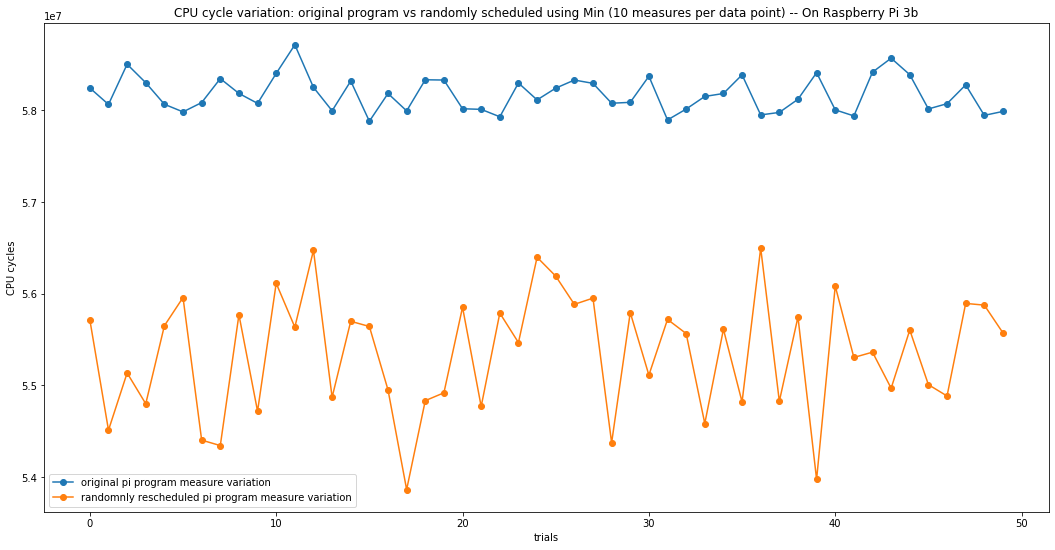

In [66]:
original_vs_rand(["../benchmark_results/cray_c_benchmark_10_rpi_cpu_cycles_O0","../benchmark_results/rand_cray_c_benchmark_10_rpi_cpu_cycles_O0"])

In [249]:
import numpy as np

In [325]:
def plot_log(files, splits=100):
    plt.figure(figsize=(28,12))
    colors = ["DeepSkyBlue", "DodgerBlue", "RoyalBlue", "MediumBlue", "Navy"]
    #lb = ["lr = 1e-3", "lr = 1e-6"]
    lb = ["fix agent"]
    
    i=0
    for file in files:
        r = []
        with open(file) as f:
            for line in f:
                if line.split()[0] == "Reward":
                    r.append(float(line.strip().split(" ")[1]))

        # Finding average of each consecutive segment 
        avg = [sum(r[i:i+splits])/splits for i in range(0, len(r[:5000])-splits, 1)]
        if file == "../rand_agent_5000.txt":
            plt.plot(avg, label="random agent")   
        else:
            plt.plot(avg, label=lb[i])
            i+=1
    plt.legend()
    plt.ylim(-0.04, 0.1)
    plt.xlabel("Episode")
    plt.ylabel("Return per episode")
    plt.savefig("fix_agent")

In [312]:
def plot_logV2(files1, files2, splits=100):
    plt.figure(figsize=(28,12))
    avgs = []
    i=0
    for file in files1:
        r = []
        with open(file) as f:
            for line in f:
                if line.split()[0] == "Reward":
                    r.append(float(line.strip().split(" ")[1]))

        # Finding average of each consecutive segment 
        avg = [sum(r[i:i+splits])/splits for i in range(0, len(r[:4735])-splits, 1)]
        print(len(avg))
        if file == "../rand_agent_5000.txt":
            plt.plot(avg, label="random agent")   
        else:
            avgs.append(np.array(avg))
            i+=1
            
    res = np.mean(avgs, axis=0)
    ci = np.std(avgs, axis = 0)
    plt.plot(res, label="ppo with env history size = 2", color='r')
    plt.fill_between(range(4635),res-ci, res+ci, color='r', alpha=.1) #std curves.
    
    avgs=[]
    if files2:
        for file in files2:
            r = []
            with open(file) as f:
                for line in f:
                    if line.split()[0] == "Reward":
                        r.append(float(line.strip().split(" ")[1]))

            # Finding average of each consecutive segment 
            avg = [sum(r[i:i+splits])/splits for i in range(0, len(r[:4735])-splits, 1)]
            print(len(avg))
            avgs.append(np.array(avg))
            res = np.mean(avgs, axis=0)
        ci = np.std(avgs, axis = 0)
        plt.plot(res, label="ppo with env history size = 8", color='purple')
        plt.fill_between(range(4635),res-ci, res+ci, color='purple', alpha=.1) #std curves.

    
    plt.legend()
    plt.xlabel("Episode")
    plt.ylabel("Return per episode")
    
    if files2:
        plt.savefig("ppo_res.png")


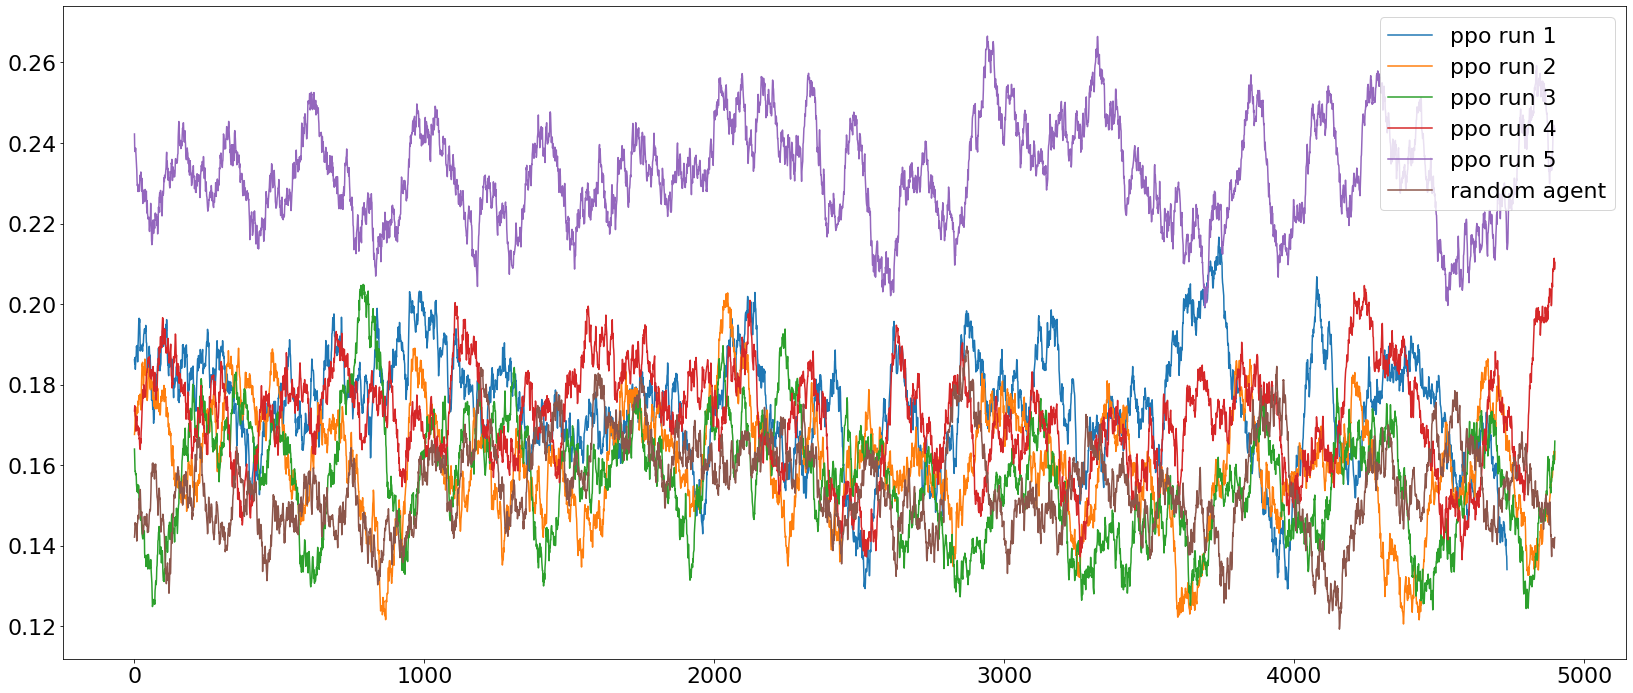

In [240]:
plot_log(["../exp1_1.txt", "../exp1_2.txt", "../exp1_3.txt", "../exp1_4.txt", "../exp1_5.txt", "../rand_agent_5000.txt"], splits=100)

4635
4635
4635
4635
4635
4635


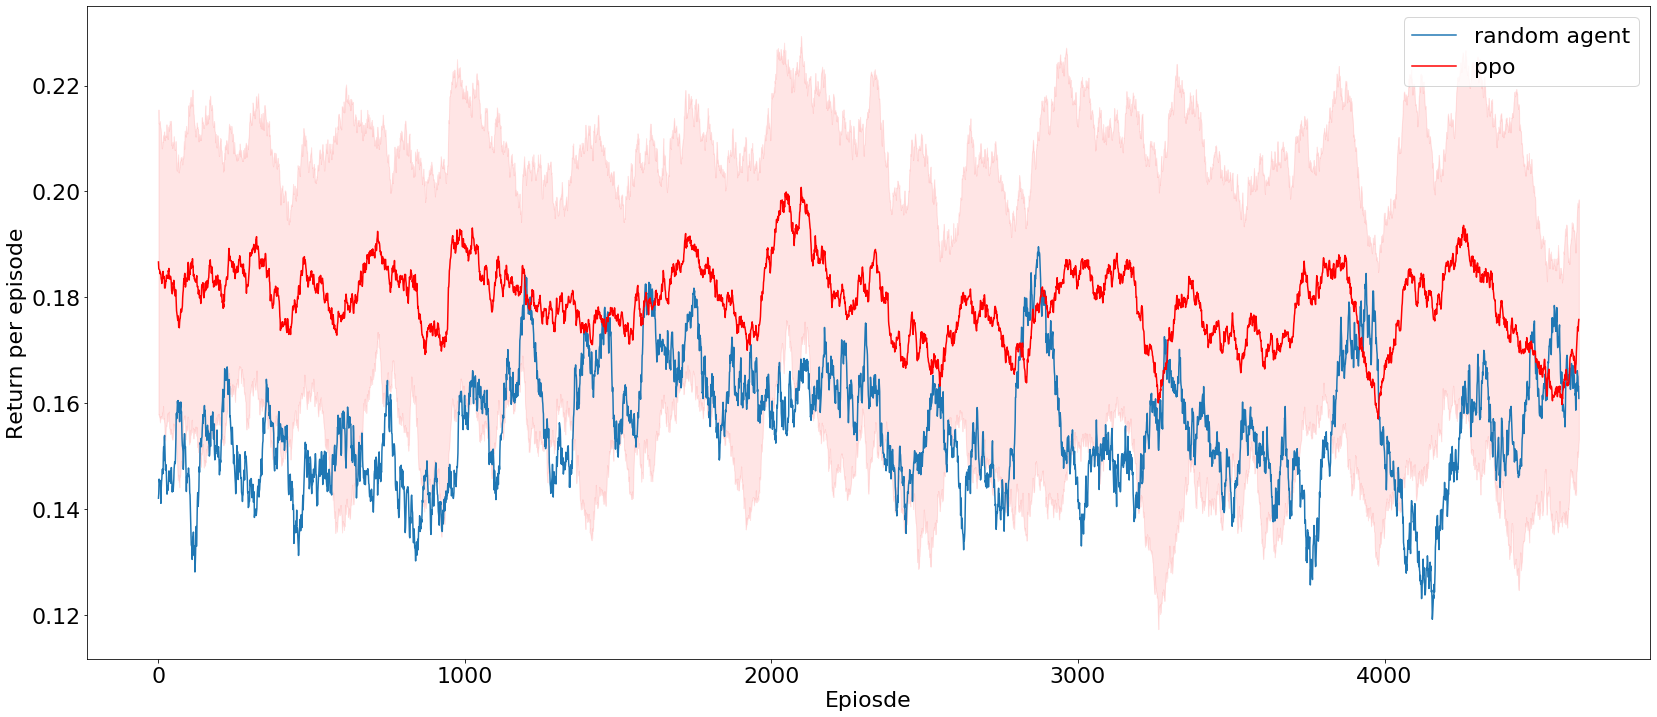

In [290]:
plot_logV2(["../exp1_1.txt", "../exp1_2.txt", "../exp1_3.txt", "../exp1_4.txt", "../exp1_5.txt", "../rand_agent_5000.txt"], [], splits=100)

4635
4635
4635
4635
4635
4635
4635
4635
4635
4635


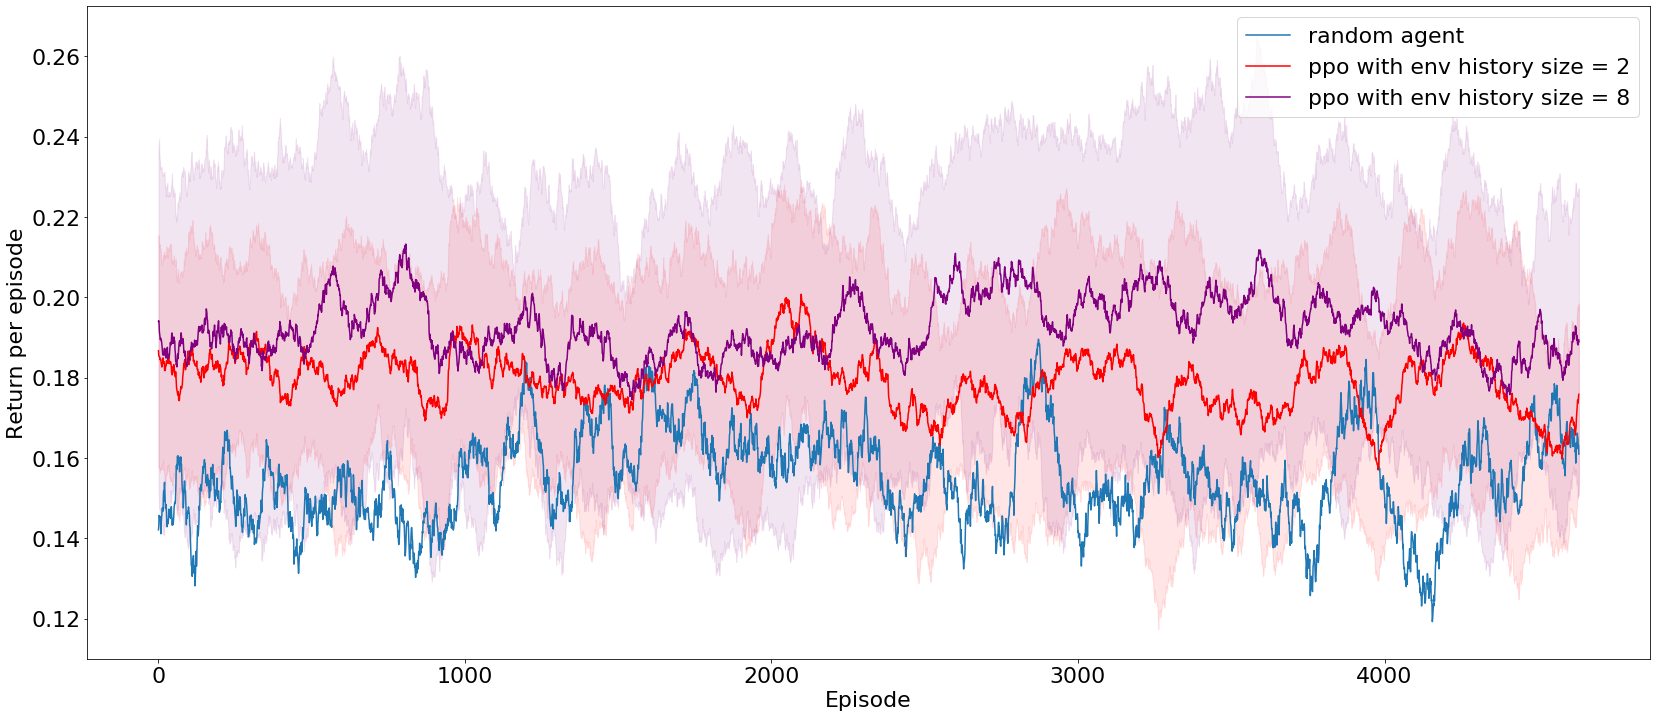

In [309]:
plot_logV2(["../exp1_1.txt", "../exp1_2.txt", "../exp1_3.txt", "../exp1_4.txt", "../exp1_5.txt", "../rand_agent_5000.txt"], ["../exp3_1.txt", "../exp3_2.txt", "../exp3_3.txt", "../exp3_4.txt"], splits=100)

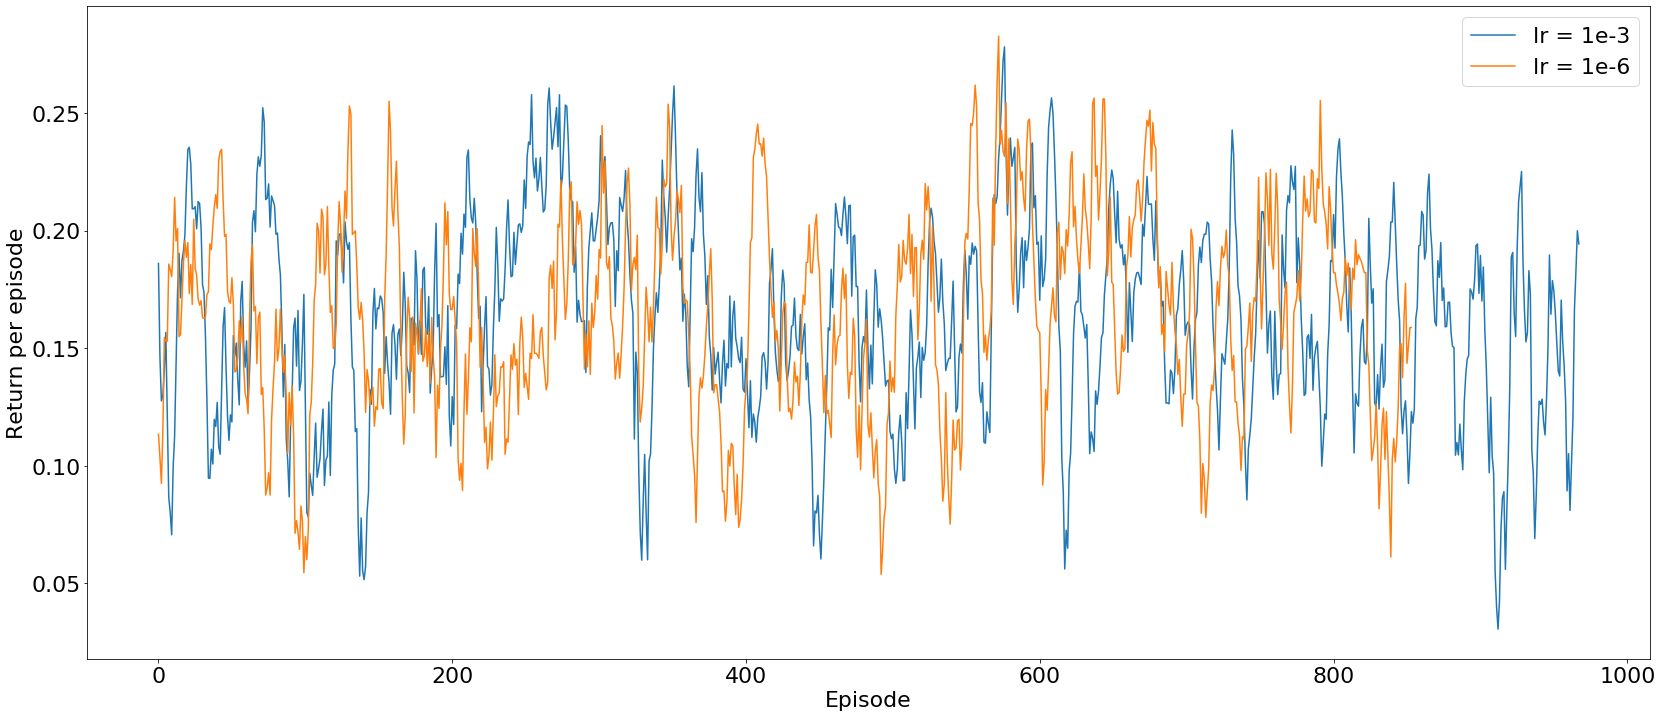

In [310]:
plot_log(["../exp2_1e3_1.txt", "../exp2_1e6_1.txt"], splits=10)

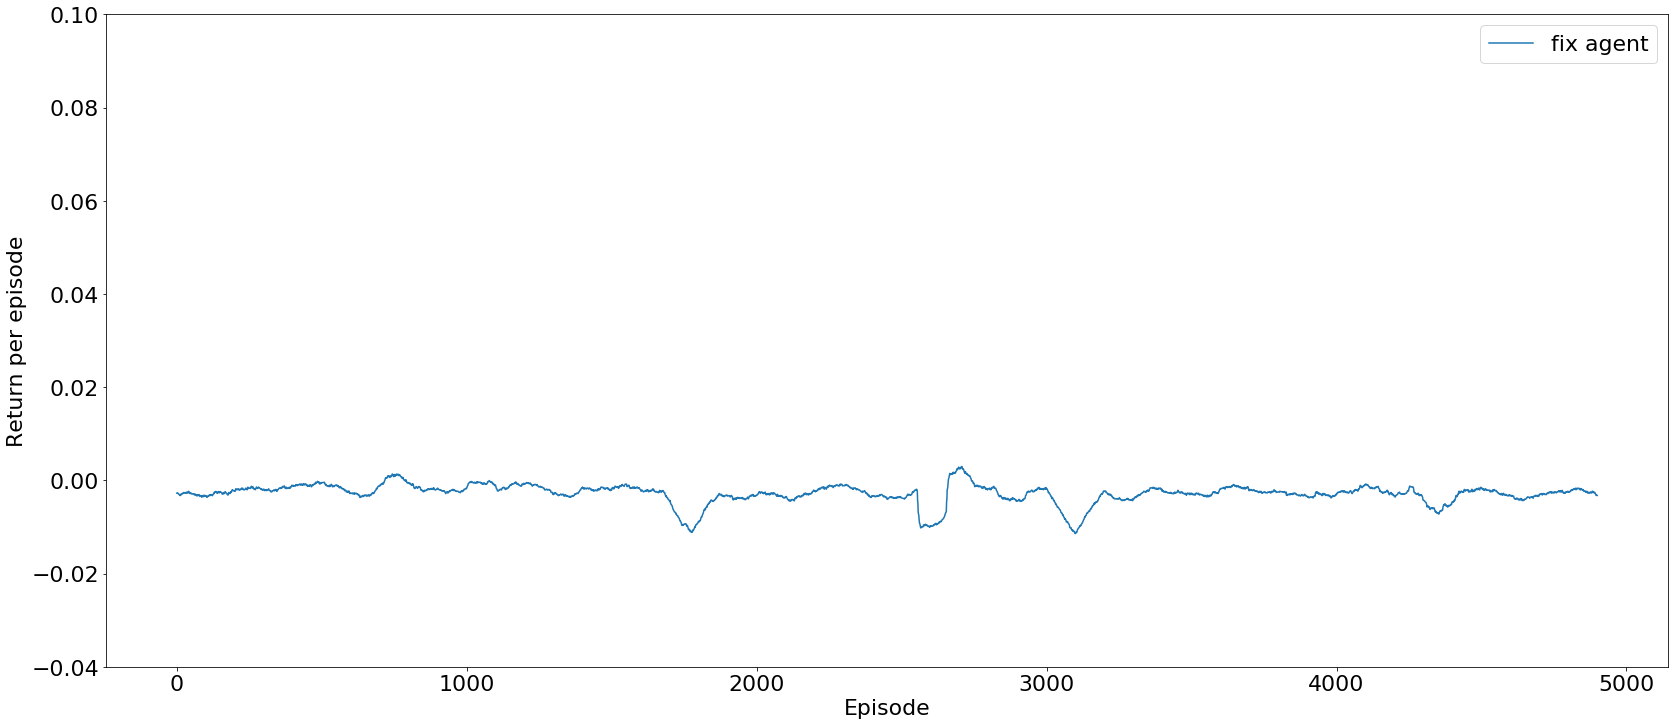

In [326]:
plot_log(["../const_prog_5000.txt"], splits=100)

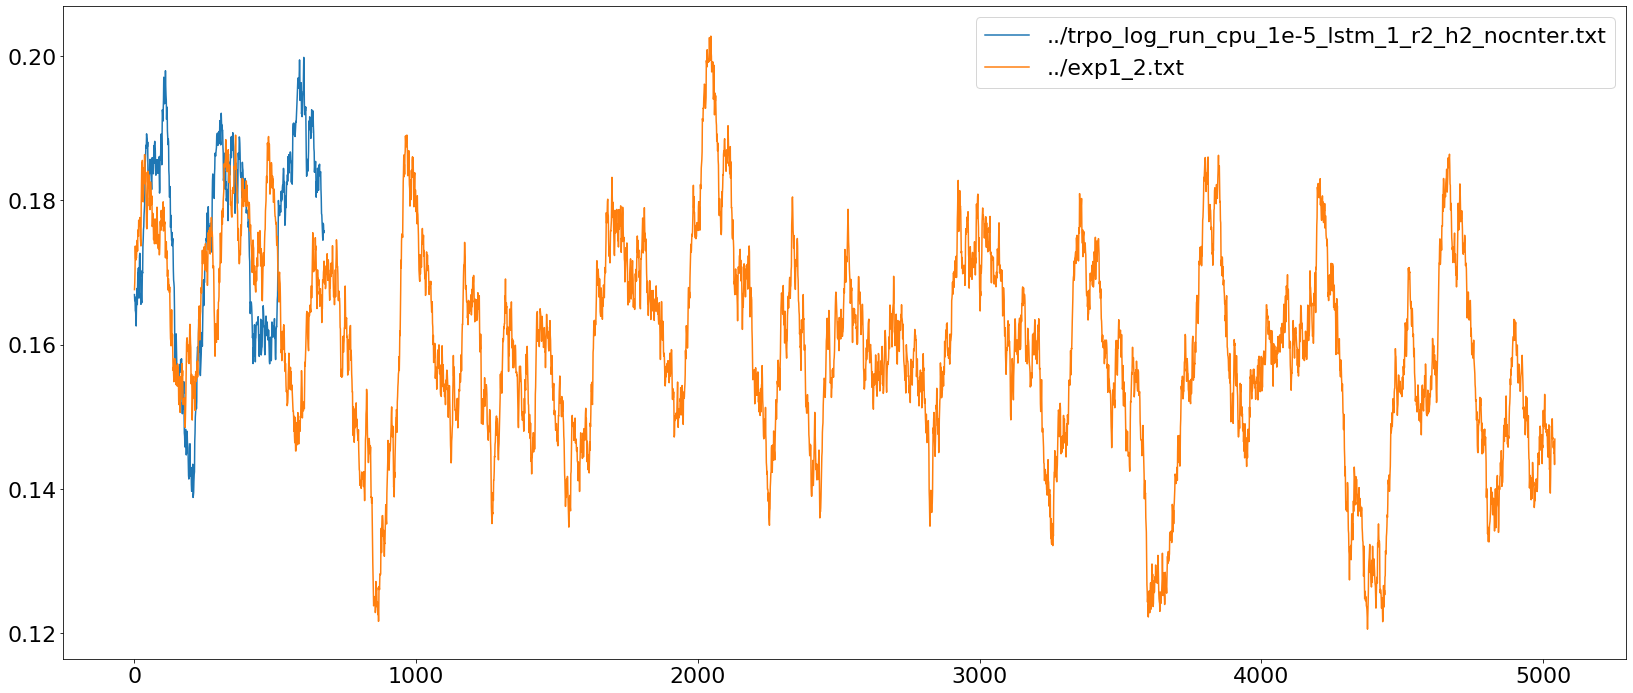

In [207]:
plot_log(["../trpo_log_run_cpu_1e-5_lstm_1_r2_h2_nocnter.txt", "../exp1_2.txt"], splits=100)